# **NAME OF DATASET**

## **About DataSet**

Information of dataset.

### **Defining Target Variable :**

## **Importing Necessary Libraries**

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading Data File**

In [154]:
df0 = pd.read_csv('/content/drive/MyDrive/Portfolio/Bank_TermDeposit/bank.csv')

In [155]:
df = df0.copy()

In [156]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

# **Understanding the data**

### How does the data look like ?

In [157]:
#df.head()

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
31712,46,blue-collar,single,tertiary,no,283,no,no,cellular,7,apr,299,1,-1,0,unknown,yes
39427,57,technician,married,secondary,no,573,yes,yes,cellular,22,may,105,2,-1,0,unknown,no
1971,50,blue-collar,divorced,primary,no,31,yes,no,unknown,9,may,237,3,-1,0,unknown,no
14334,36,management,married,tertiary,no,327,yes,no,cellular,14,jul,74,6,-1,0,unknown,no
17041,26,entrepreneur,married,tertiary,yes,144,no,yes,cellular,25,jul,730,1,-1,0,unknown,no
38183,49,services,divorced,primary,no,400,yes,no,telephone,15,may,64,1,-1,0,unknown,no
865,35,technician,married,secondary,no,118,yes,no,unknown,7,may,236,1,-1,0,unknown,no
42441,80,retired,married,secondary,no,462,no,no,cellular,7,dec,127,2,-1,0,unknown,no
10992,56,entrepreneur,divorced,tertiary,no,22946,no,no,unknown,17,jun,75,3,-1,0,unknown,no
23758,58,management,married,tertiary,no,0,no,no,cellular,28,aug,24,9,-1,0,unknown,no


### How big is the data ?

In [158]:
#df.shape

print("--- Data Information ---")
print("\n  Data-Set Size =", len(df))
print("  Total Features = ", df.shape[1])
print("\n------------------------")

--- Data Information ---

  Data-Set Size = 45211
  Total Features =  17

------------------------


### What is the data_type of columns ?

In [159]:
df.dtypes

#df.info()

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [160]:
categorical_var = df.select_dtypes(include = 'object')                  # categorical features
categorical_var.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [161]:
numerical_var = df.select_dtypes(include = 'int')                      # numerical features
numerical_var.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Are there any missing values ?

In [162]:
#df.isnull().sum()

df.isna().sum()
#df.isnull().mean()*100

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [163]:
# temp = pd.DataFrame(df.isna().sum(),columns=(['Total Null Values']))
# temp2 = temp[temp['Total Null Values']>0]

# temp2['% of Null Values'] = (temp2['Total Null Values']/1460)*100
# temp2.sort_values(by='% of Null Values', ascending=False)

### How does the data look mathematically ?

In [164]:
df.describe()                           # checking statistical values for features.

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Are there any duplicate values ?

In [165]:
df.duplicated().sum()

0

### How is the correlation between columns ?

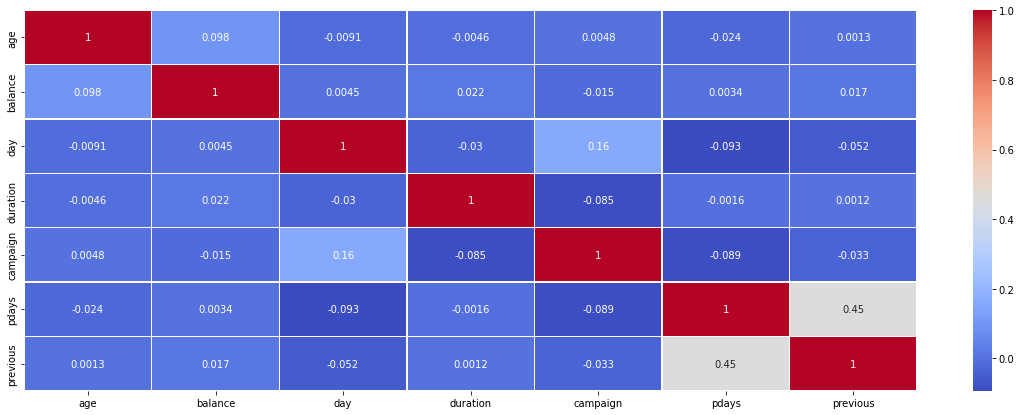

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [166]:
plt.figure(figsize=(20,7))                                            # sholud be check multiple times 
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.show()

df.corr()

### **Insight**

**There are 45,211 records and 17 features in the dataset.**

**DataSet consists of 10 categorical and 7 numerical features.**

**The are no missing values.**

# **EDA**

# **Visualisation**

In [167]:
# !pip install pandas-profiling 

In [168]:
# from pandas_profiling import ProfileReport

In [169]:
# prof = ProfileReport(df)

# prof.to_file(output_file = 'output.html')

## **Checking Target variable**

In [170]:
pd.DataFrame(df['Target'].value_counts())

,Target
no,39922
yes,5289


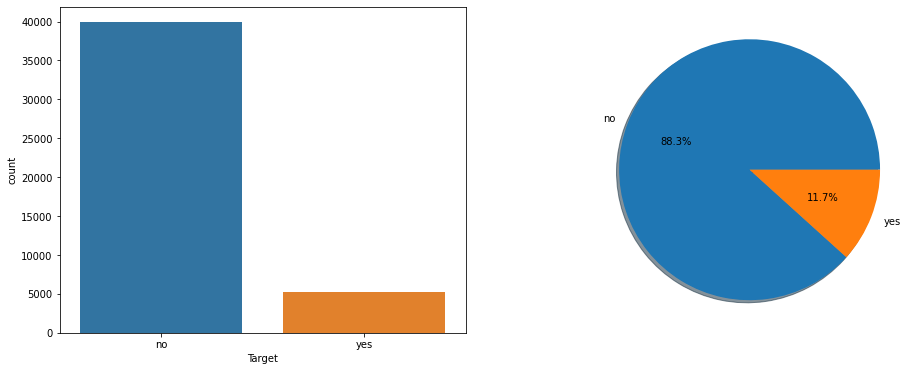

In [171]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.countplot(data=df, x='Target')
plt.subplot(122)
plt.pie(df['Target'].value_counts(), labels=df['Target'].value_counts().index,
        autopct='%.1f%%',shadow=True)
plt.show()

### **Insight**

- We have a highly 'Im-balance' data.

# **Understanding the Categorical Features**

In [172]:
categorical_var1 = list(df.select_dtypes(include=['object']))
df[categorical_var1].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### **Insight**

We have two types of categorical data here:
- Ordinal : 'education'
- Nominal : remaining features

## **job**

In [173]:
age_dist = df.groupby('job')['age'].mean()

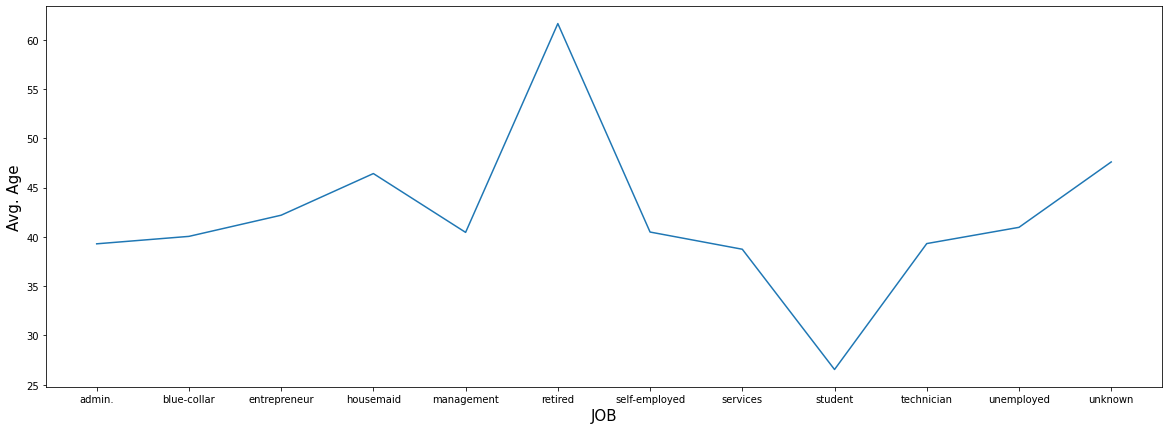

In [174]:
plt.figure(figsize=(20,7))
plt.plot(age_dist)
plt.xlabel("JOB", fontsize=15)
plt.ylabel('Avg. Age', fontsize=15)
plt.show()

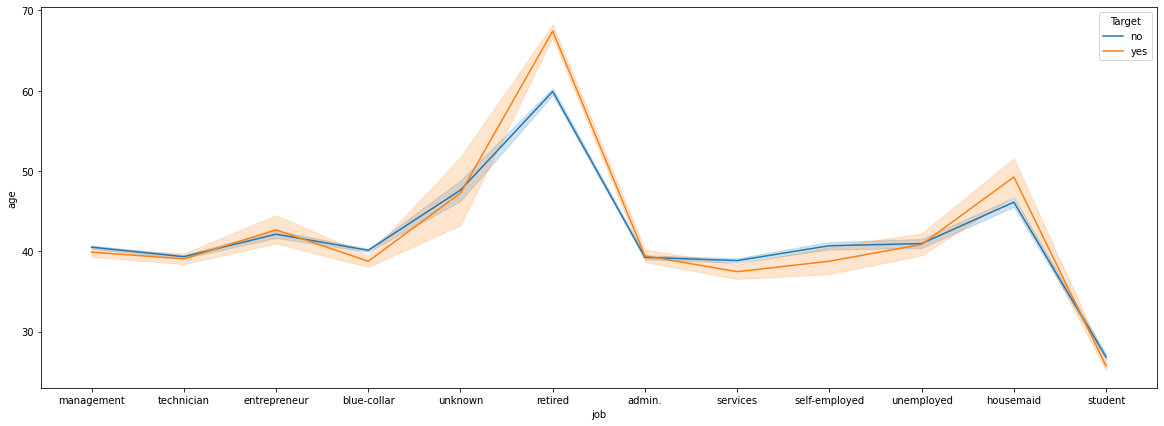

In [175]:
plt.figure(figsize=(20,7))
sns.lineplot("job", "age", hue="Target", data=df)
plt.show()

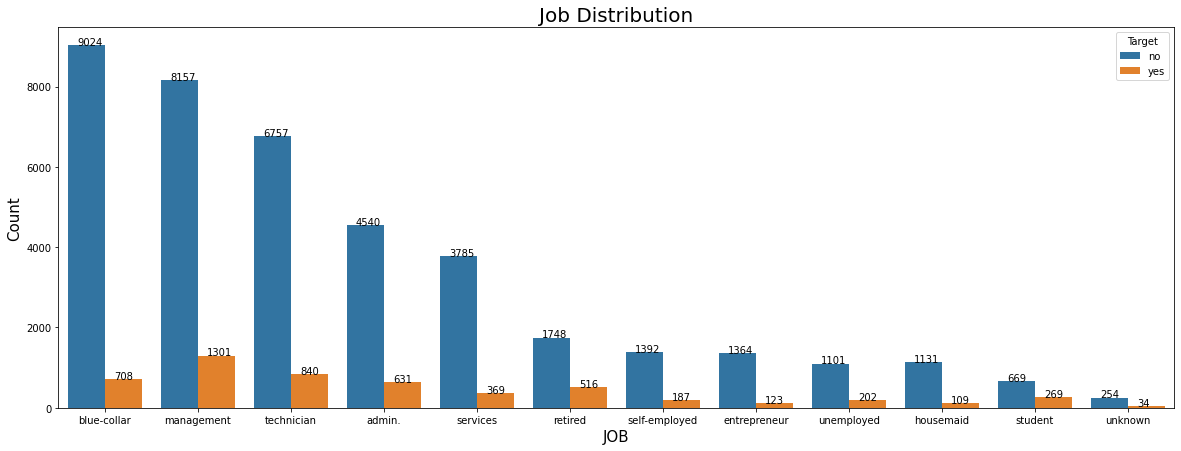

In [176]:
plt.figure(figsize = (20,7))
x=sns.countplot(data=df, x='job', hue='Target', order = df['job'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+1.0))
plt.xlabel("JOB", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)
plt.show()

In [177]:
a = df[df['Target']=='yes']
b = df[df['Target']=='no']

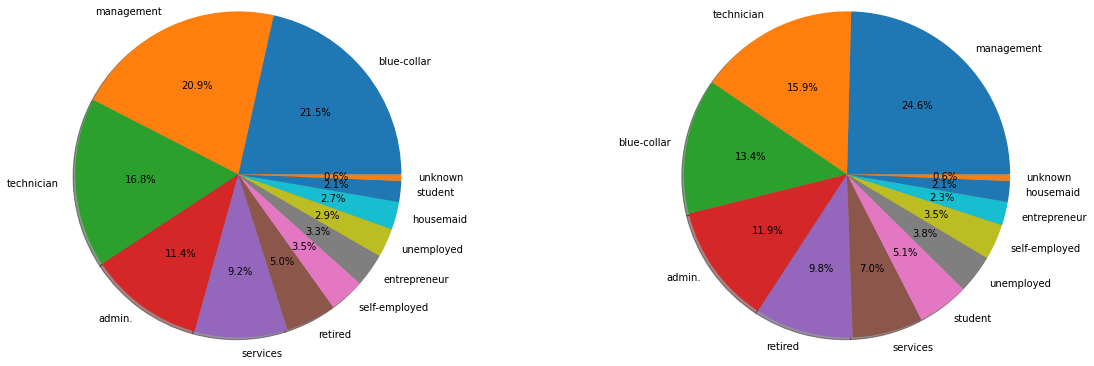

In [178]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.pie(df['job'].value_counts(), labels=df['job'].value_counts().index,
        autopct='%.1f%%',shadow=True, radius=1.5)
plt.subplot(122)
plt.pie(a['job'].value_counts(), labels=a['job'].value_counts().index,
        autopct='%.1f%%',shadow=True, radius=1.5)
plt.show()

### **Insight**

**The count of 'Blue-collar' is higher than the other. Also the count for 'Management' and 'Technician' is noticeable.**

**Clients who have the 'management' job profile has subscribed more to term-deposit**

## **marital**

In [179]:
pd.DataFrame(df.groupby(['marital'])['Target'].value_counts())

Target
marital  Target        
divorced no        4585
         yes        622
married  no       24459
         yes       2755
single   no       10878
         yes       1912

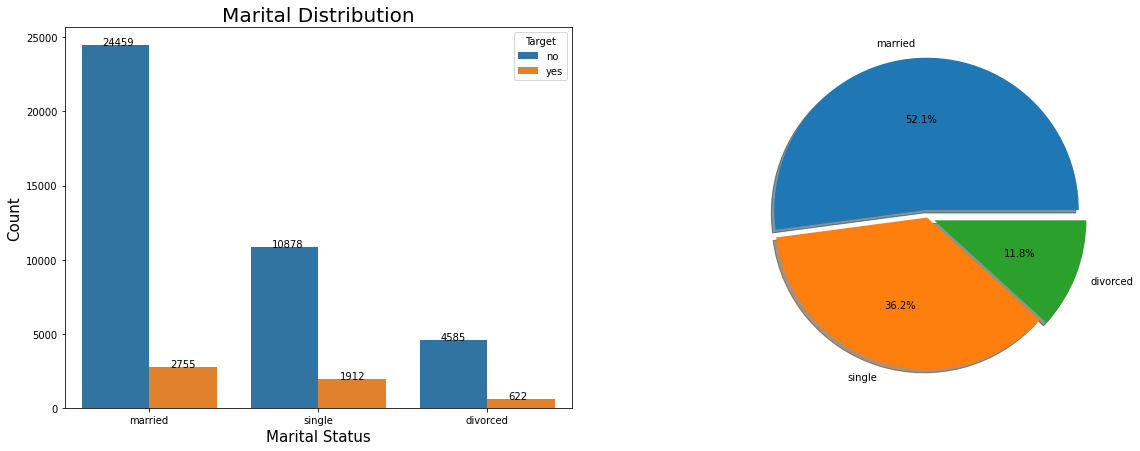

In [180]:
plt.figure(figsize = (20,7))

plt.subplot(121)
x=sns.countplot(data=df, x='marital', hue='Target', order = df['marital'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.125, i.get_height()))
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=20)

plt.subplot(122)
plt.pie(a['marital'].value_counts(), labels=a['marital'].value_counts().index, autopct='%.1f%%', shadow=True, explode=[0.05,0,0.05])
plt.show()

### **Insight**

**Here we can see the Mareied people are more subscribing a term deposit. But here is also 50 percente chances to suscribe by other clients as we can see here.**

## **education**

In [181]:
pd.DataFrame(df.groupby(['education'])['Target'].value_counts())

Target
education Target        
primary   no        6260
          yes        591
secondary no       20752
          yes       2450
tertiary  no       11305
          yes       1996
unknown   no        1605
          yes        252

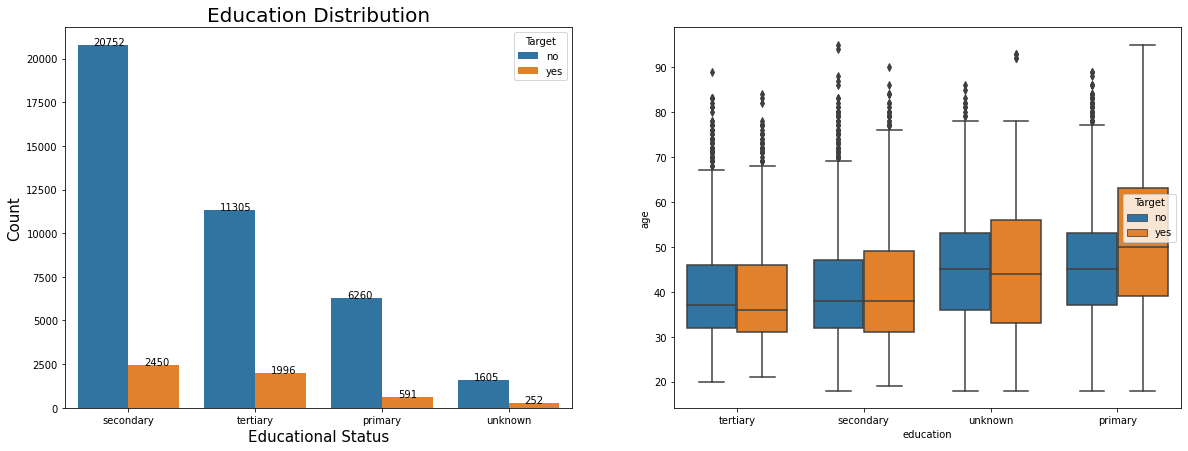

In [182]:
plt.figure(figsize = (20,7))

plt.subplot(121)
x=sns.countplot(data=df, x='education', hue='Target', order = df['education'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.125, i.get_height()))
plt.xlabel("Educational Status", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=20)

plt.subplot(122)
sns.boxplot(data=df, x='education', y='age', hue='Target')
plt.show()

### **Insights**

**The clients having secondary education are more .And the clients having unknown eduction are less.**

**There are outliers present in each education criteria . But the clients having tertiary education are more in percentage who have subscribed a term deposit.**

## **default**

In [183]:
pd.DataFrame(df.groupby(['default'])['Target'].value_counts())

Target
default Target        
no      no       39159
        yes       5237
yes     no         763
        yes         52

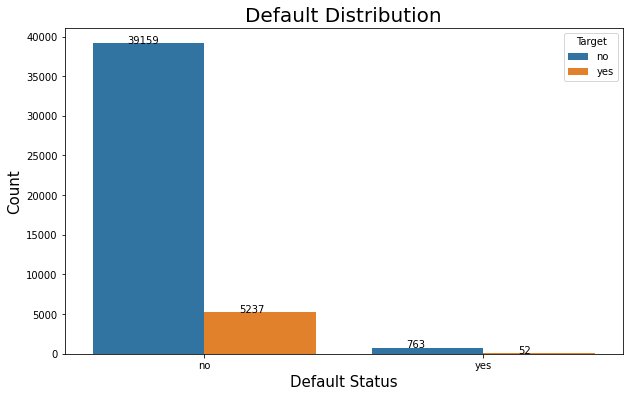

In [184]:
plt.figure(figsize=(10,6))
x=sns.countplot(data=df, x='default', hue='Target', order = df['default'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.125, i.get_height()))
plt.xlabel("Default Status", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=20)
plt.show()

### **Insight**

**The clients having bydefault credit are less than those who don't have bydefault credit.**

## **housing**

In [185]:
pd.DataFrame(df.groupby(['housing'])['Target'].value_counts())

Target
housing Target        
no      no       16727
        yes       3354
yes     no       23195
        yes       1935

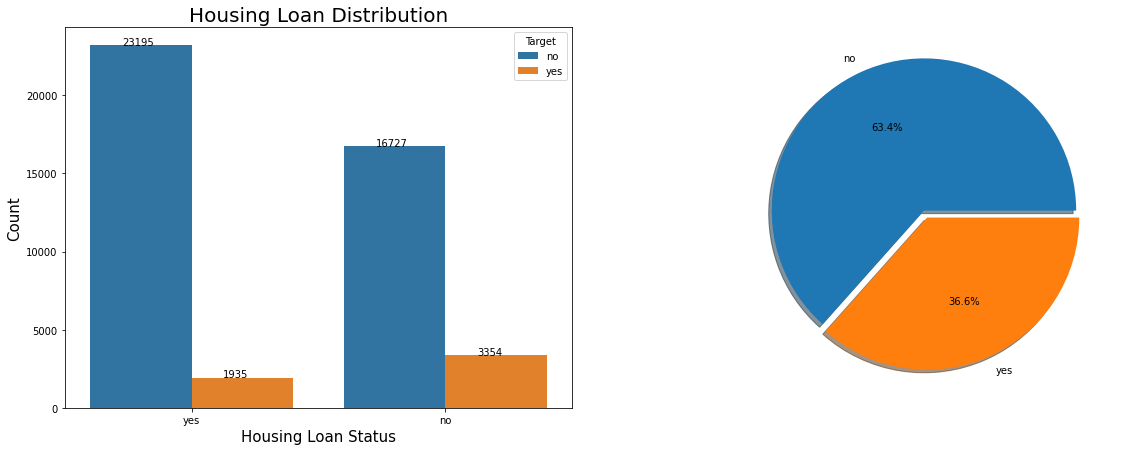

In [186]:
plt.figure(figsize = (20,7))

plt.subplot(121)
x=sns.countplot(data=df, x='housing', hue='Target', order = df['housing'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.125, i.get_height()))
plt.xlabel("Housing Loan Status", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Loan Distribution', fontsize=20)

plt.subplot(122)
plt.pie(a['housing'].value_counts(), labels=a['housing'].value_counts().index,
        autopct='%.1f%%', shadow=True, explode=[0.05,0])
plt.show()

### **Insights**

**The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.**

**The clients who don't have taken housing loan have subscribed a term deposite with more than 50% chances.**

## **loan**

In [187]:
pd.DataFrame(df.groupby(['loan'])['Target'].value_counts())

Target
loan Target        
no   no       33162
     yes       4805
yes  no        6760
     yes        484

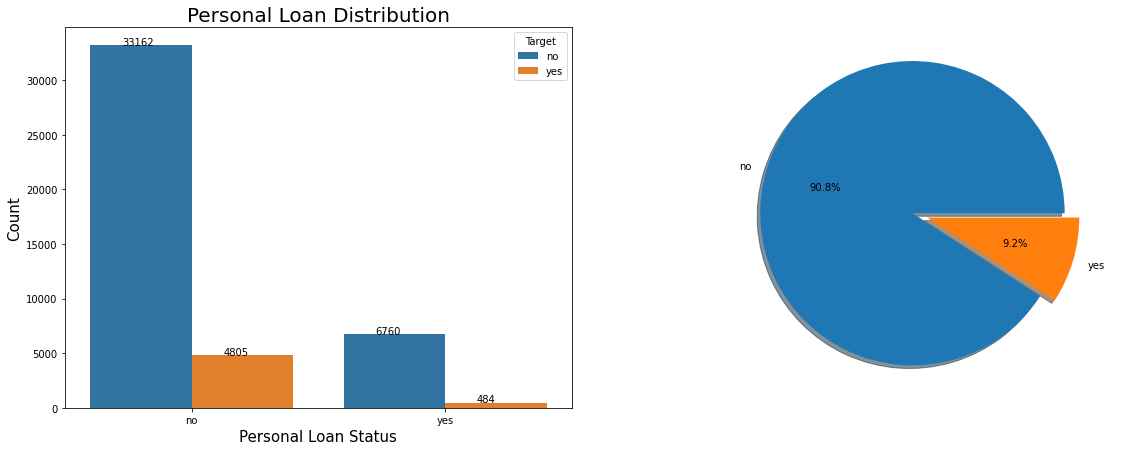

In [188]:
plt.figure(figsize = (20,7))

plt.subplot(121)
x=sns.countplot(data=df, x='loan', hue='Target', order = df['loan'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.125, i.get_height()))
plt.xlabel("Personal Loan Status", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Personal Loan Distribution', fontsize=20)

plt.subplot(122)
plt.pie(a['loan'].value_counts(), labels=a['loan'].value_counts().index,
        autopct='%.1f%%', shadow=True, explode=[0.1,0])
plt.show()

### **Insights**

**The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count.**

**Also the clients having No Personal loan will have maximum chances to subscribe to term deposit.**

## **contact**

In [189]:
pd.DataFrame(df.groupby(['contact'])['Target'].value_counts())

Target
contact   Target        
cellular  no       24916
          yes       4369
telephone no        2516
          yes        390
unknown   no       12490
          yes        530

In [190]:
x = df['age'].min()
y = df['age'].max()
print('Minimum age in dataset is: ', x)
print('Maximum age in dataset is: ', y)

Minimum age in dataset is:  18
Maximum age in dataset is:  95


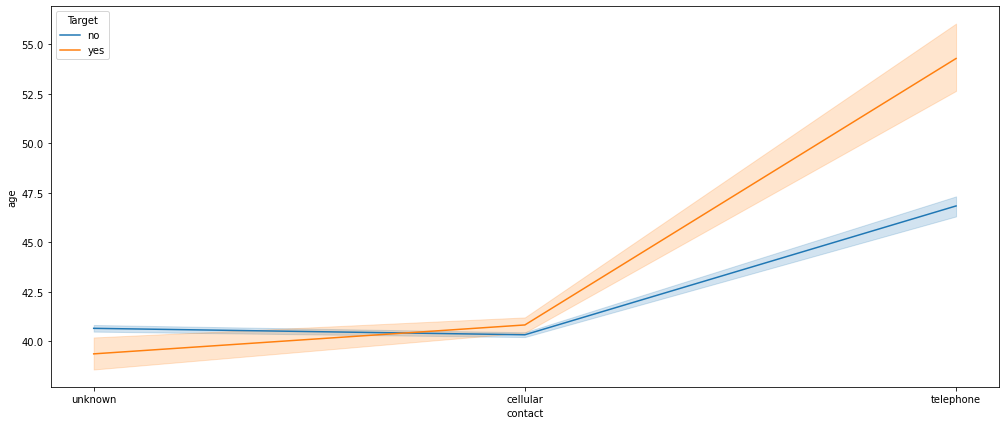

In [191]:
plt.figure(figsize=(17,7))
sns.lineplot("contact", "age", hue="Target", data=df)
plt.show()

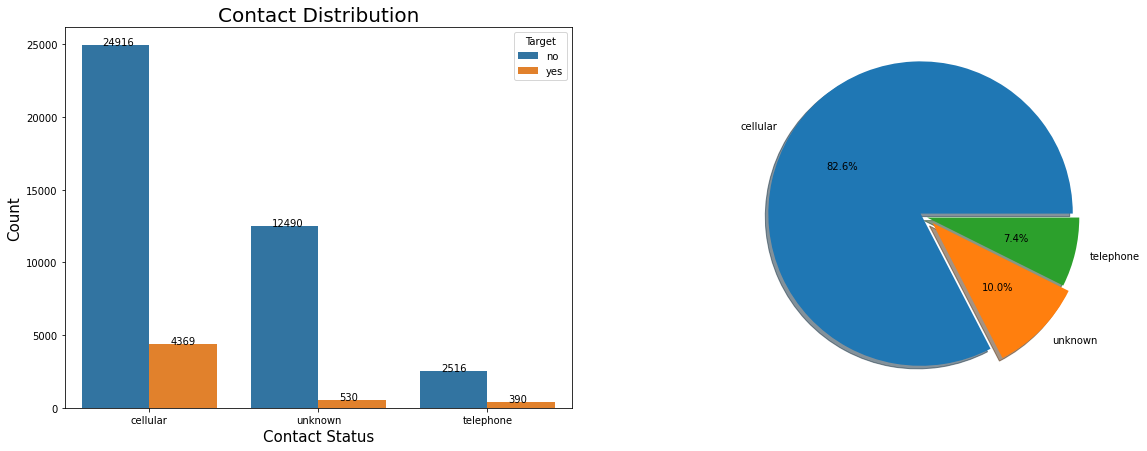

In [192]:
plt.figure(figsize = (20,7))

plt.subplot(121)
x=sns.countplot(data=df, x='contact', hue='Target', order = df['contact'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.125, i.get_height()))
plt.xlabel("Contact Status", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=20)

plt.subplot(122)
plt.pie(a['contact'].value_counts(), labels=a['contact'].value_counts().index,
        autopct='%.1f%%', shadow=True, explode=[0.05,0.05,0])
plt.show()

### **Insights**

**The count of a clients who can be contacted by Cellular is high than the others.**

**Also their chances of subscribing to term deposit is high as compare to others.**

## **month**

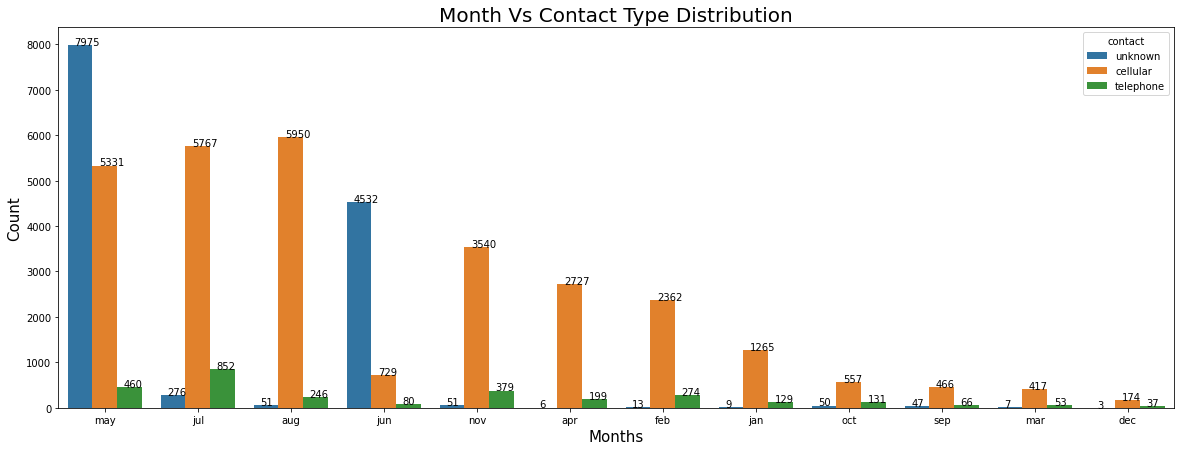

In [193]:
plt.figure(figsize=(20,7))
x=sns.countplot(data=df, x='month', hue='contact', order = df['month'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.07, i.get_height()))
plt.xlabel("Months", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Month Vs Contact Type Distribution', fontsize=20)
plt.show()

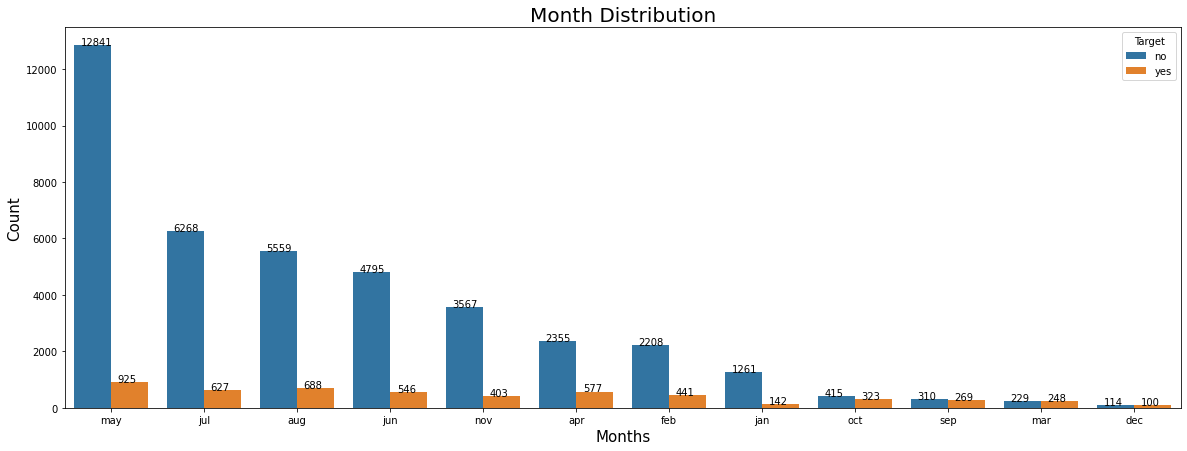

In [194]:
plt.figure(figsize=(20,7))
x=sns.countplot(data=df, x='month', hue='Target', order = df['month'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.07, i.get_height()))
plt.xlabel("Months", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Month Distribution', fontsize=20)
plt.show()

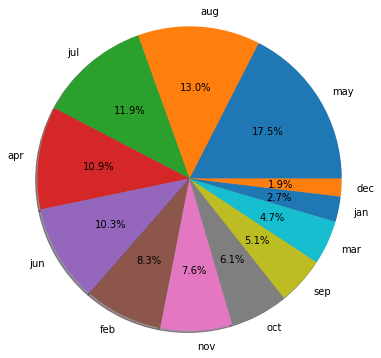

In [195]:
plt.pie(a['month'].value_counts(), labels=a['month'].value_counts().index,
        autopct='%.1f%%', shadow=True, radius=1.75)
plt.show()

### **Insights**

**The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.**

## **p_outcome**

In [196]:
pd.DataFrame(df.groupby(['poutcome'])['Target'].value_counts())

Target
poutcome Target        
failure  no        4283
         yes        618
other    no        1533
         yes        307
success  yes        978
         no         533
unknown  no       33573
         yes       3386

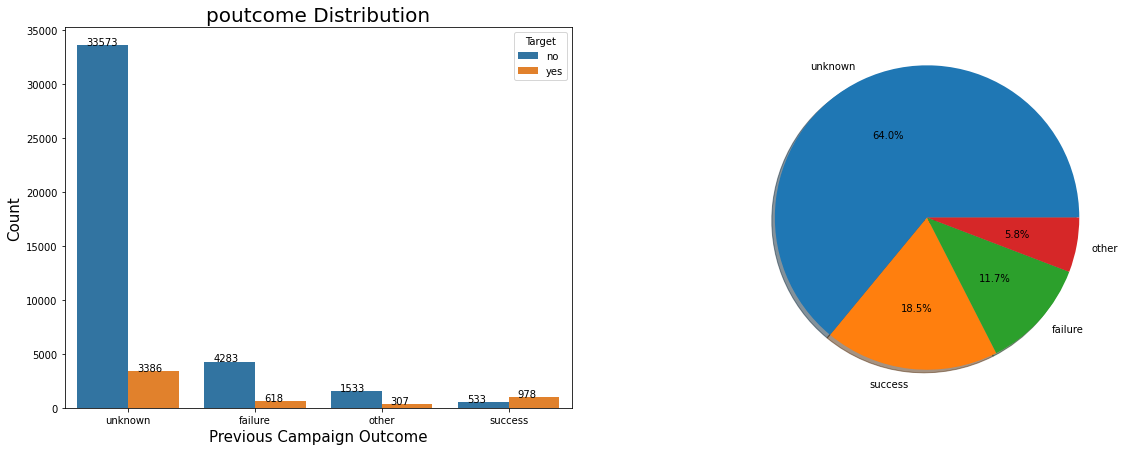

In [197]:
plt.figure(figsize=(20,7))

plt.subplot(121)
x=sns.countplot(data=df, x='poutcome', hue='Target', order = df['poutcome'].value_counts().index)
for i in x.patches:
   x.annotate('{:}'.format(i.get_height()), (i.get_x()+0.07, i.get_height()))
plt.xlabel("Previous Campaign Outcome", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('poutcome Distribution', fontsize=20)

plt.subplot(122)
plt.pie(a['poutcome'].value_counts(), labels=a['poutcome'].value_counts().index,
        autopct='%.1f%%', shadow=True)

plt.show()

### **Insights**

# **Understanding the Numerical Features**

## **age**

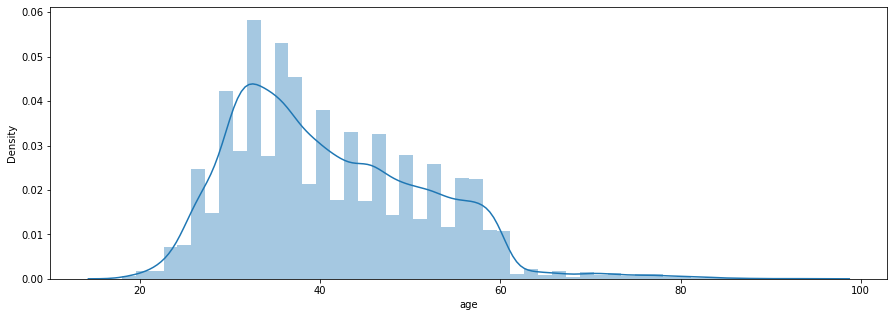

In [198]:
plt.figure(figsize=(15,5))
sns.distplot(df['age'])
plt.show()

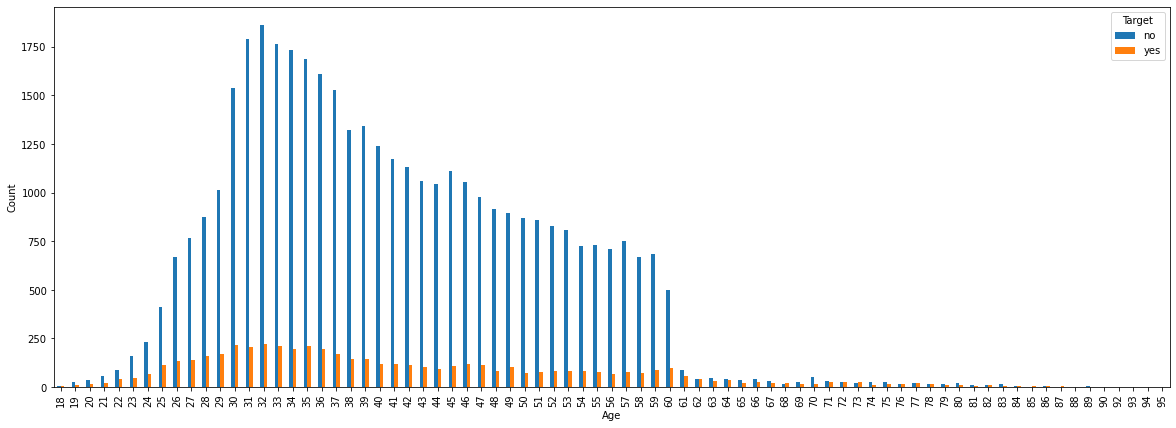

In [199]:
pd.crosstab(df['age'], df['Target']).plot(kind="bar",figsize=(20,7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### **Finding Outliers in 'age' feature.**

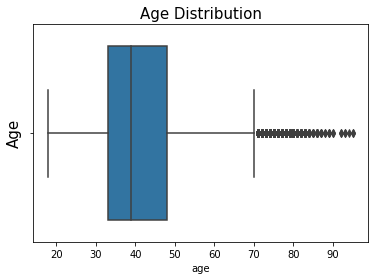

In [200]:
sns.boxplot(data=df, x='age')
plt.ylabel("Age", fontsize=15)
plt.title('Age Distribution', fontsize=15)
plt.show()

In [201]:
# Outlier ==>> ( (Q3) + 1.5(Q3 - Q1) )                 # for upper inner fence
    
print('Ages above: ', df['age'].quantile(q = 0.75) + 1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  70.5 are outliers


In [202]:
q = df[df['age'] > 70.5]['age'].count()
print('Number of outliers: ', q)

Number of outliers:  487


In [203]:
print('Outliers are: ', round(q*100/len(df),2), '%')

Outliers are:  1.08 %


In [204]:
qq = df[(df['age']>70.5)]
qq.Target.value_counts()

no     269
yes    218
Name: Target, dtype: int64

In [205]:
# Outlier ==>> ( (Q3) + 3(Q3 - Q1) )                 # for upper outer fence
    
print('Ages above: ', df['age'].quantile(q = 0.75) + 3*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  93.0 are outliers


In [206]:
q = df[df['age'] > 93]['age'].count()
print('Number of outliers: ', q)

Number of outliers:  3


In [207]:
qq = df[(df['age']>93)]
qq.Target.value_counts()

no     2
yes    1
Name: Target, dtype: int64

In [208]:
df[df['age'] > 93]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
31233,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
33699,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
41663,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no


### **Insights**

**Most of the clients are aged between 30yr to 50yrs.**

**Here we can see the percentage of the outliers is less, so we can fit the model with and without them.**

**Just looking at the graphs we cannot conclude if age have a high effect to our Target variable.**

## **balance**

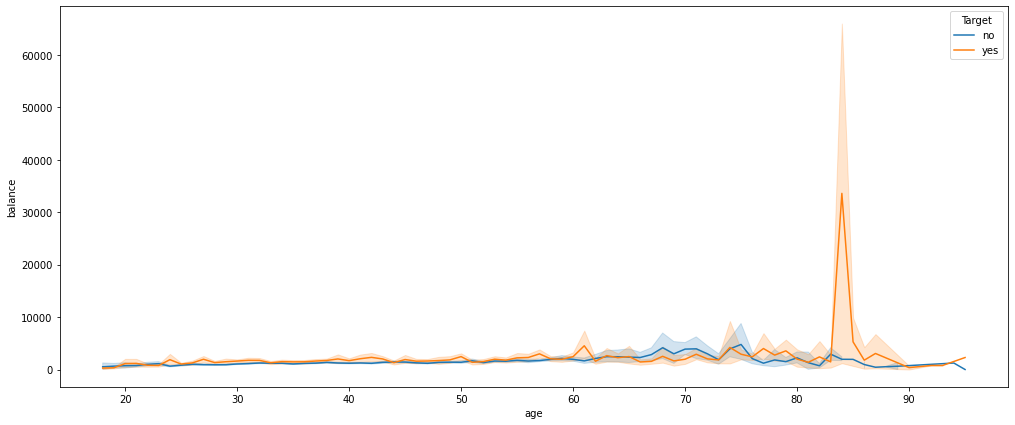

In [209]:
plt.figure(figsize=(17,7))
sns.lineplot("age", "balance", hue="Target", data=df)
plt.show()

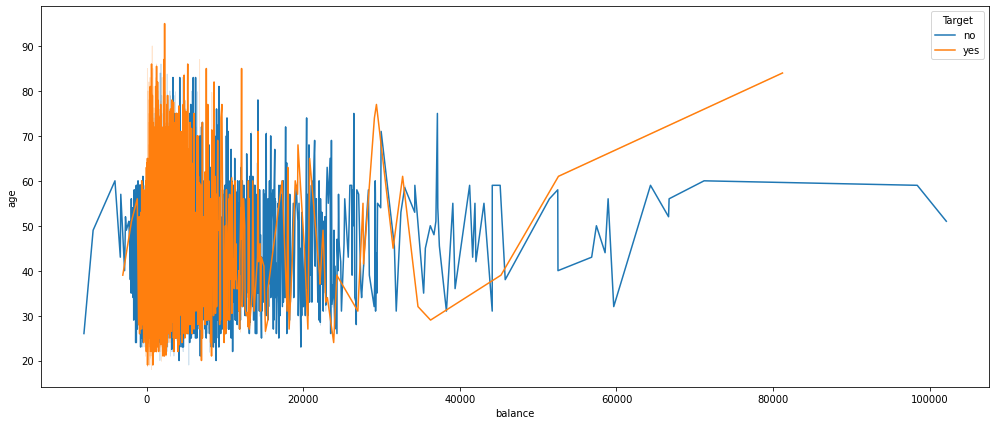

In [210]:
plt.figure(figsize=(17,7))
sns.lineplot("balance", "age", hue="Target", data=df)
plt.show()

In [211]:
qq = df[(df['balance']>30000) & (df['age']>=61)]
qq

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
31222,61,retired,married,tertiary,no,32685,no,no,cellular,2,mar,1447,2,-1,0,unknown,yes
40763,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,10,aug,290,1,-1,0,unknown,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
42990,75,retired,divorced,primary,no,37127,no,no,cellular,11,feb,505,1,-1,0,unknown,no
43053,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,15,feb,394,3,189,1,success,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes


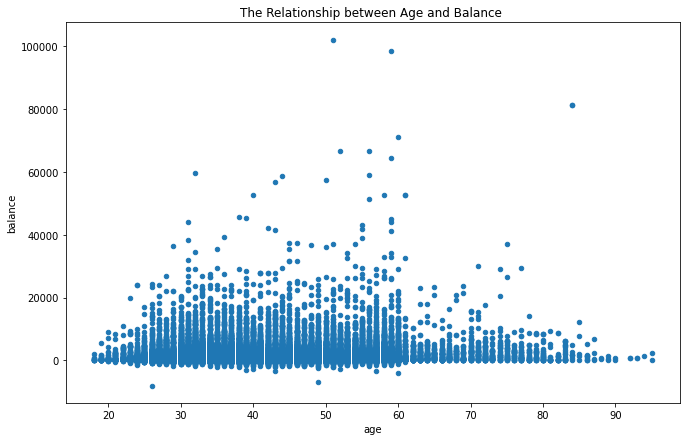

In [212]:
age_balance = df.plot.scatter('age','balance', figsize = (11,7))

plt.title('The Relationship between Age and Balance ')
plt.show()

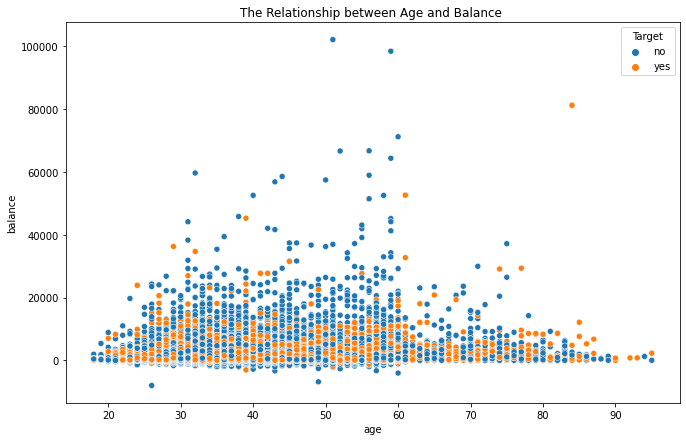

In [213]:
plt.figure(figsize = (11,7))
sns.scatterplot(data=df, x='age', y='balance', hue='Target')
plt.title('The Relationship between Age and Balance ')
plt.show()

### **Finding outliers in 'balance' feature**

In [214]:
print('Balance above: ', df['balance'].quantile(q = 0.75) + 
      1.5*(df['balance'].quantile(q = 0.75) - df['balance'].quantile(q = 0.25)), 'are outliers')

Balance above:  3462.0 are outliers


In [215]:
print('Balance above: ', df['balance'].quantile(q = 0.75) + 
      3*(df['balance'].quantile(q = 0.75) - df['balance'].quantile(q = 0.25)), 'are outliers')

Balance above:  5496.0 are outliers


In [216]:
pp = df[(df['balance']>3462)]
pp.Target.value_counts()

no     3946
yes     766
Name: Target, dtype: int64

In [217]:
pp = df[(df['balance']>5496)]
pp.Target.value_counts()

no     2074
yes     366
Name: Target, dtype: int64

In [218]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [219]:
pp = df[(df['balance']>0)]
pp.Target.value_counts()

no     33144
yes     4787
Name: Target, dtype: int64

### **Insights**

***

**There's no such clear relation between a client's 'age' and 'balance'.**

**Clients who have 'balance' less than 15,000/- euros have subscribed more to term deposit ('Target Variable').**

**We can see as the age of the customer increases; their balance is decreasing and clients tend to have a significantly lower balance, mostly under 50000 euros.**

**Clients above age 60yr and have balance greater than 50k euros have 100% subscribtion rate to term-deposit.**

## **day**

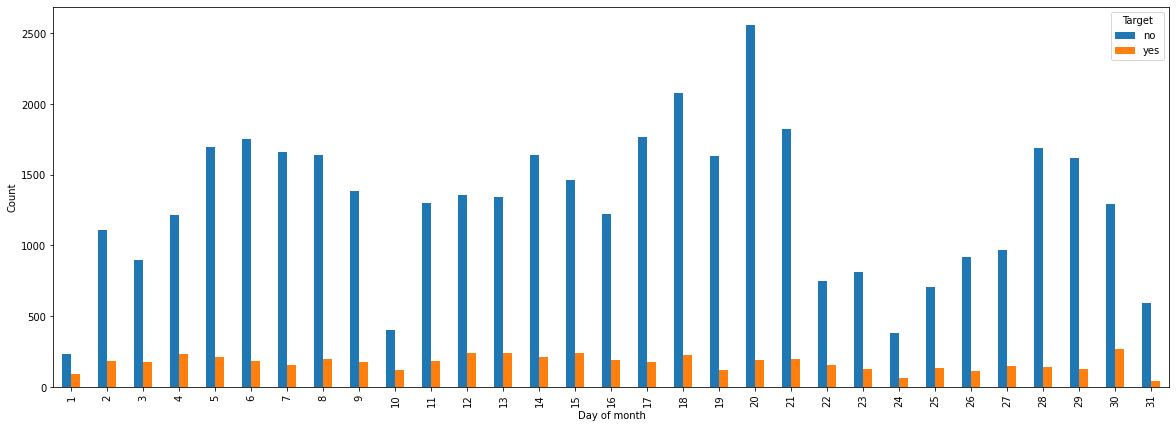

In [220]:
pd.crosstab(df['day'], df['Target']).plot(kind="bar",figsize=(20,7))
plt.xlabel('Day of month')
plt.ylabel('Count')
plt.show()

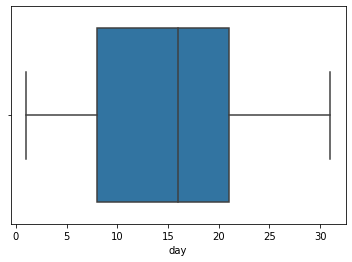

In [221]:
sns.boxplot(x=df["day"])
plt.show()

### **Insights**

**Most of the contacts are done in between 8th-21st day of the particular month.**

**And Also there is no outlier present.**

## **duration**

-  if duration=0 then y='no'

In [222]:
pp = df[(df['duration']==0)]
pp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


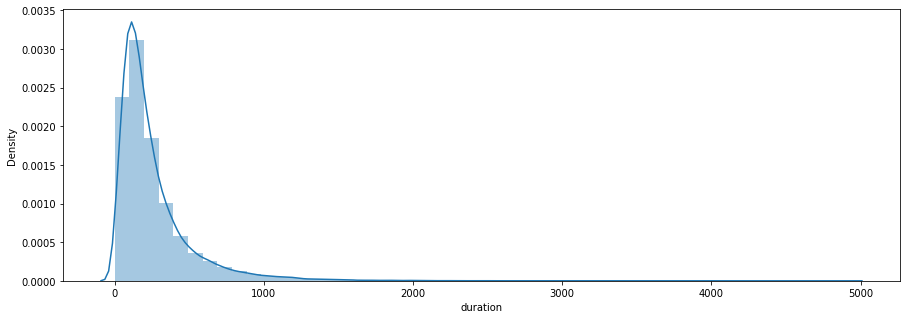

In [223]:
plt.figure(figsize=(15,5))
sns.distplot(df['duration'])
plt.show()

### **Finding outliers in 'durtion' feature**

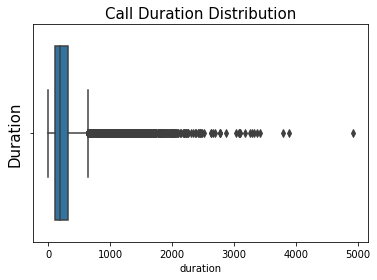

In [224]:
sns.boxplot(data=df, x='duration')
plt.ylabel("Duration", fontsize=15)
plt.title('Call Duration Distribution', fontsize=15)
plt.show()

In [225]:
print('Duration above: ', df['duration'].quantile(q = 0.75) + 
      1.5*(df['duration'].quantile(q = 0.75) - df['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  643.0 are outliers


In [226]:
print('Duration above: ', df['duration'].quantile(q = 0.75) + 
      3*(df['duration'].quantile(q = 0.75) - df['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  967.0 are outliers


In [227]:
pp = df[(df['duration']>643)]
pp.Target.value_counts()

yes    1651
no     1584
Name: Target, dtype: int64

In [228]:
pp = df[(df['duration']>967)]
pp.Target.value_counts()

yes    693
no     462
Name: Target, dtype: int64

### **Insights**

**We cannot conclude if duration have a high effect to our Target variable.**


**Here we can see the percentage of the outliers (7.12%) is less; but the distribution of response of clients is almost equal.**

## **campaign**

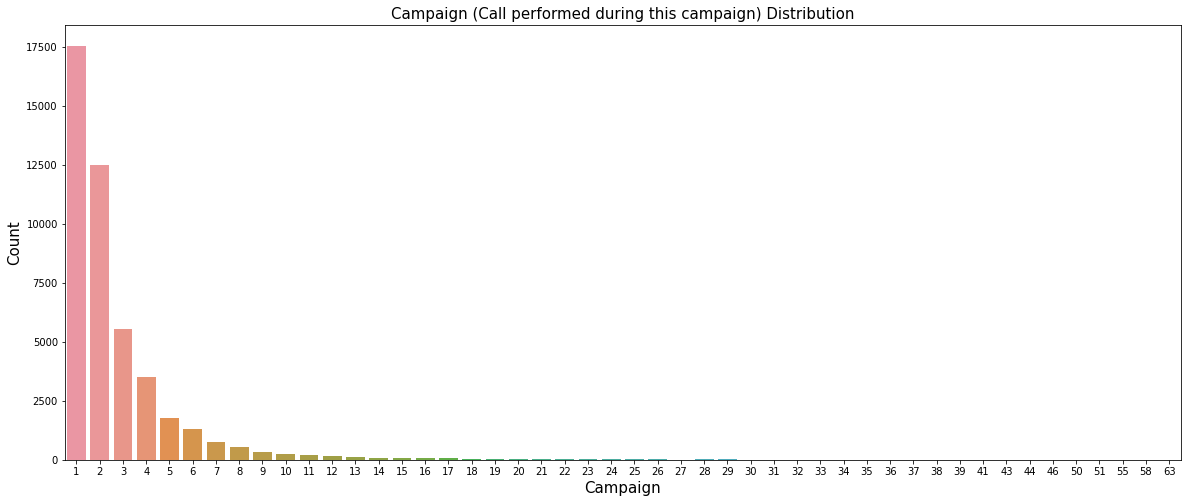

In [229]:
plt.figure(figsize = (20,8))
sns.countplot(x='campaign', data=df)
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign (Call performed during this campaign) Distribution', fontsize=15)
plt.show()

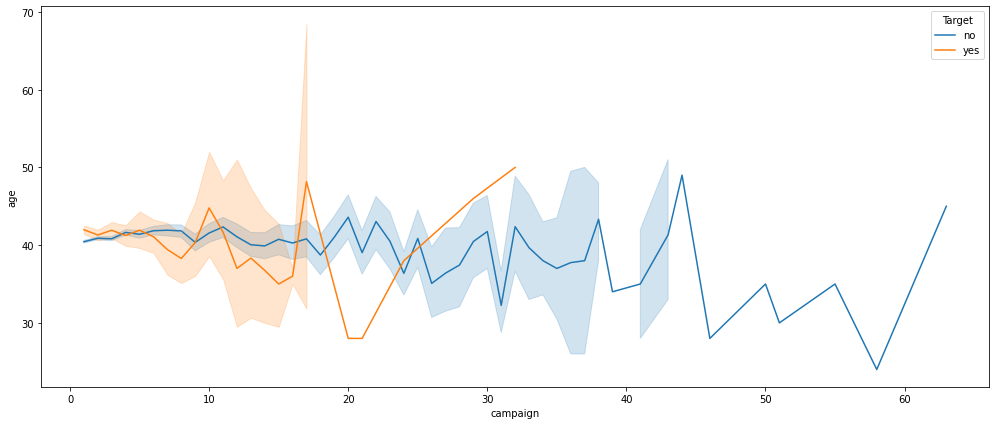

In [230]:
plt.figure(figsize=(17,7))
sns.lineplot("campaign", "age", hue="Target", data=df)
plt.show()

### **Finding outliers in 'campaign' feature**

In [231]:
print('No. of calls(during this campaign) above: ', df['campaign'].quantile(q = 0.75) + 
      1.5*(df['campaign'].quantile(q = 0.75) - df['campaign'].quantile(q = 0.25)), 'are outliers')

No. of calls(during this campaign) above:  6.0 are outliers


In [232]:
pp = df[(df['campaign']>6)]
pp.Target.value_counts()

no     2903
yes     161
Name: Target, dtype: int64

In [233]:
print('No. of calls(during this campaign) above: ', df['campaign'].quantile(q = 0.75) + 
      3*(df['campaign'].quantile(q = 0.75) - df['campaign'].quantile(q = 0.25)), 'are outliers')

No. of calls(during this campaign) above:  9.0 are outliers


In [234]:
pp = df[(df['campaign']>9)]
pp.Target.value_counts()

no     1401
yes      61
Name: Target, dtype: int64

### **Insights**

**Most number of contacts performed during this campaign is less than 3.**



## **pdays**

**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [235]:
df[df['pdays']==999]                # checking for customers who were not contacted.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [236]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

### **Insights**

**We are having the data of only those people who were also contacted for the previous campaign.**

**We will have to drop this feature; as more than 80% of the records are '-1', which generally means that values were unknown and hence were filled with '-1' value.**

## **previous**

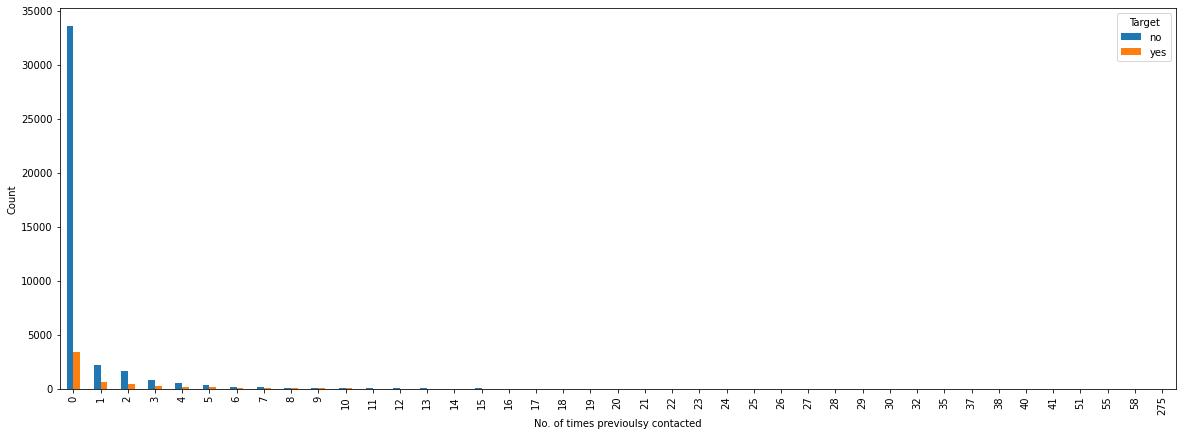

In [237]:
pd.crosstab(df['previous'], df['Target']).plot(kind="bar",figsize=(20,7))
plt.xlabel('No. of times previoulsy contacted')
plt.ylabel('Count')
plt.show()

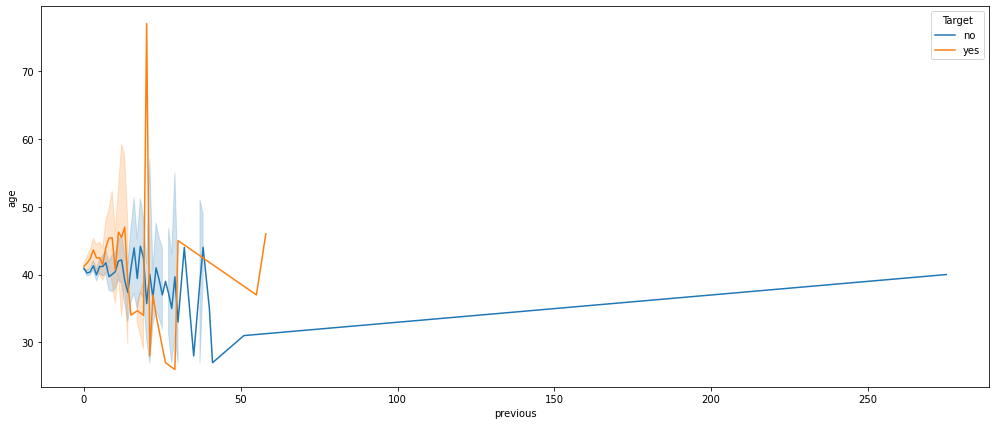

In [238]:
plt.figure(figsize=(17,7))
sns.lineplot("previous", "age", hue="Target", data=df)
plt.show()

In [239]:
print('No. of contacts before this campaign above: ', df['previous'].quantile(q = 0.75) + 
      1.5*(df['previous'].quantile(q = 0.75) - df['previous'].quantile(q = 0.25)), 'are outliers')

No. of contacts before this campaign above:  0.0 are outliers


In [240]:
print('No. of contacts before this campaign above: ', df['previous'].quantile(q = 0.75) + 
      3*(df['previous'].quantile(q = 0.75) - df['previous'].quantile(q = 0.25)), 'are outliers')

No. of contacts before this campaign above:  0.0 are outliers


In [241]:
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [242]:
pr = df[(df['previous']>50)]
pr.Target.value_counts()

no     2
yes    2
Name: Target, dtype: int64

In [243]:
pr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
28886,31,management,single,tertiary,no,358,yes,no,cellular,30,jan,68,3,256,51,failure,no
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no
38326,46,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,353,58,other,yes
44089,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,776,55,failure,yes


In [244]:
pr = df[(df['previous']>60)]
pr.Target.value_counts()

no    1
Name: Target, dtype: int64

### **Insights**

**Most clients were contacted less than 50 times.**

**As the number of contacts increases the average age of the clients decreases.**

# **Preprocessing**
---------------------------------------------------------------------------
Feature Engineering :

 1) Feature Transformation :

      a) Imputting Missing Values ✅

      b) Handling Categorical Features

      c) Outliers Detections

      d) Feature Scaling

  2) Feature Construction

  3) Feature Selection

  - Variable Transformation

  
  4) Feature Extraction


---------------------------------------------------------------------------

## **Replacing 'Unknown' values with other categorical values**

In [245]:
cols = [i for i in df.columns]
col_missing = []
for i in cols:
    if 'unknown' in df[i].values:
        col_missing.append(i)
        
print("Columns with Unknown Values :- ",col_missing)
print('\n\n')

Columns with Unknown Values :-  ['job', 'education', 'contact', 'poutcome']





In [246]:
print("Unknown values count\n")
for i in col_missing:
    print(i,"-",df[df[i].str.contains('unknown')][i].count())

Unknown values count

job - 288
education - 1857
contact - 13020
poutcome - 36959


### **education**

In [247]:
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'primary'

In [248]:
df['education'].value_counts()

secondary    23352
tertiary     13543
primary       6896
unknown       1420
Name: education, dtype: int64

In [249]:
df.education.mode()

0    secondary
dtype: object

In [250]:
df['education'] = df.education.replace('unknown',df.education.mode()[0])

In [251]:
df.education.value_counts()

secondary    24772
tertiary     13543
primary       6896
Name: education, dtype: int64

### **job**

In [252]:
df.job.mode()

0    blue-collar
dtype: object

In [253]:
df.loc[(df['job'] == 'unknown') & (df['education']=='primary'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='secondary'), 'job'] = 'technician'
df.loc[(df['job'] == 'unknown') & (df['education']=='tertiary'), 'job'] = 'management'

In [254]:
df['job'] = df.job.replace('unknown',df.job.mode()[0])

In [255]:
df.job.value_counts()

blue-collar      9783
management       9497
technician       7795
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

## **Changing 'duration' feature time from seconds to minutes**

In [256]:
#df['duration'] = df['duration'].apply(lambda n:n/60).round(3)

-  if duration=0 then y='no'

In [257]:
pp = df[(df['duration']==0)]
pp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


# **Deleting Outliers**

In [258]:
import warnings
warnings.filterwarnings('ignore')

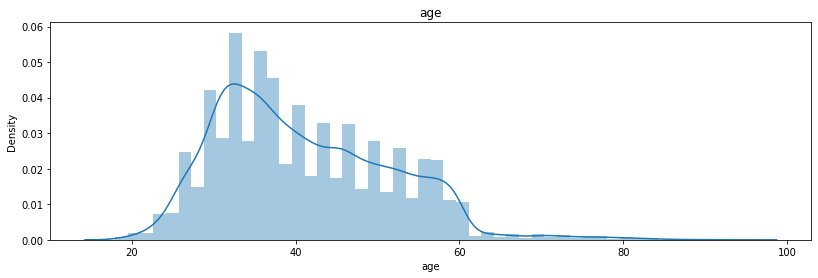

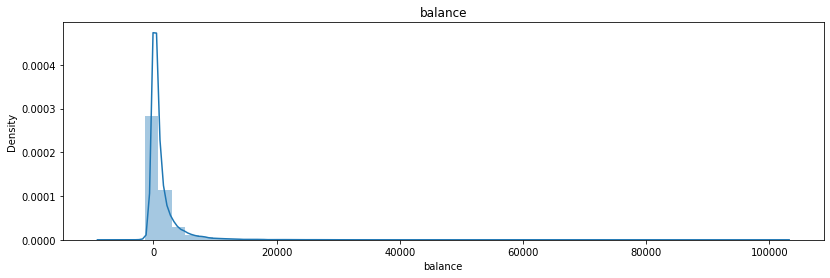

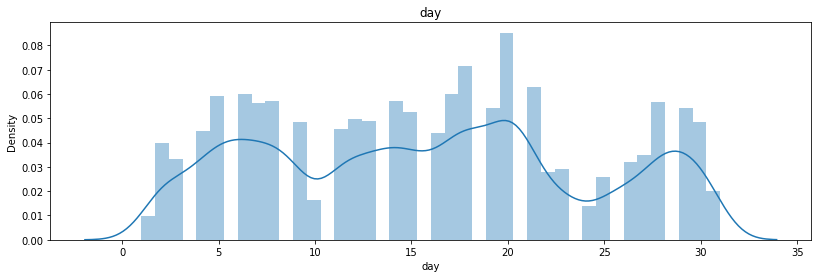

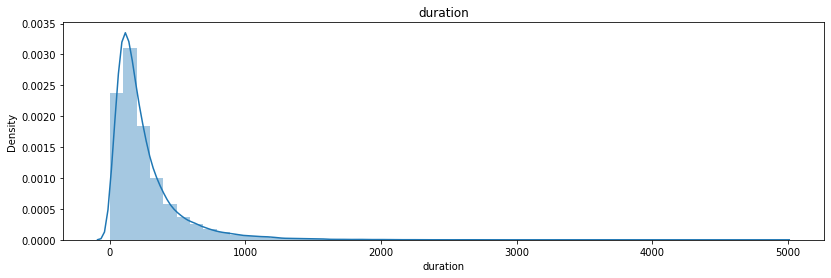

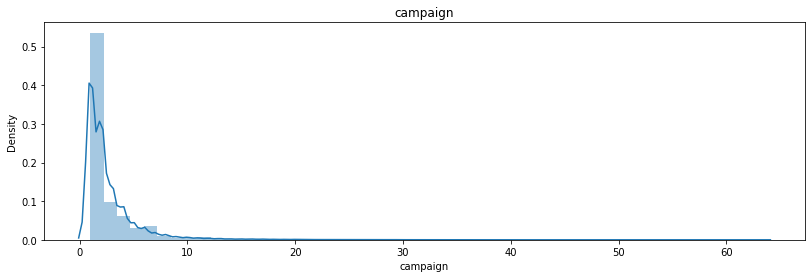

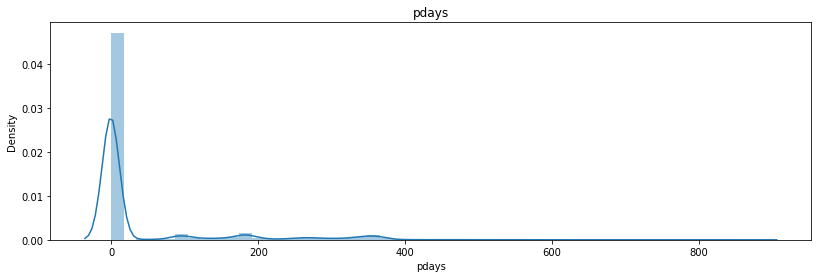

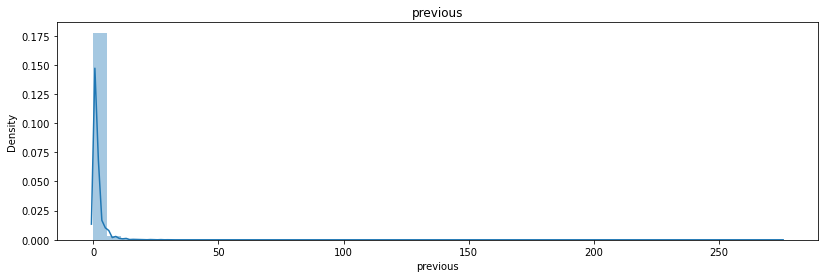

In [259]:
f = df.select_dtypes(include = np.number)

for i in f:
  plt.figure(figsize=(30,4))
  plt.subplot(121)
  sns.distplot(df[i])
  plt.title(i)

### **age**

In [260]:
outlier = df['age'].quantile(q = 0.75) + 3*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25))
outlier

93.0

In [261]:
count = df[df['age']>outlier].index
count

Int64Index([31233, 33699, 41663], dtype='int64')

In [262]:
df.drop(count, axis=0, inplace=True)

In [263]:
df.shape

(45208, 17)

In [264]:
# Let's reset the index
df.reset_index(inplace=True, drop=True)

### **previous**

In [265]:
outlier1 = df['age'].quantile(q = 0.75) + 3*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25))

In [266]:
count1 = df[df['previous']>outlier].index
count1

Int64Index([29182], dtype='int64')

In [267]:
df[df['previous']>60]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


In [268]:
df.drop(count1, axis=0, inplace=True)

In [269]:
df.shape

(45207, 17)

In [270]:
df.reset_index(inplace=True, drop=True)

### **duration**

In [271]:
outlier2 = df[df['duration']==0].index

In [272]:
outlier2

Int64Index([6424, 22937, 36422], dtype='int64')

In [273]:
df.drop(outlier2, axis=0, inplace=True)

In [274]:
df.shape

(45204, 17)

In [275]:
df.reset_index(inplace=True, drop=True)

## **Defining 'X' and 'y'**

In [276]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

### **Train - Test Split**

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=77, stratify=y)

## **Handling Categorical Features**



In [279]:
df['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [280]:
# Encoding for Ordinal Data

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['primary','secondary','tertiary']], dtype=np.int64)

In [281]:
X_train.loc[:,['education']] = oe.fit_transform(X_train.loc[:,['education']])

In [282]:
X_train.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
38073,39,blue-collar,single,1,no,522,yes,no,telephone,14,may,225,7,350,2,failure
3509,41,retired,divorced,0,no,-233,yes,no,unknown,15,may,1156,2,-1,0,unknown
7648,31,blue-collar,married,1,yes,-13,yes,no,unknown,30,may,176,4,-1,0,unknown
25603,44,self-employed,married,2,no,4411,yes,no,cellular,19,nov,85,1,-1,0,unknown
27345,45,blue-collar,divorced,0,no,942,no,no,cellular,21,nov,362,1,-1,0,unknown


In [283]:
X_train['education'].unique()

array([0, 2, 1])

In [284]:
X_test.loc[:,['education']] = oe.transform(X_test.loc[:,['education']])

In [285]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
11856,56,blue-collar,married,1,no,475,yes,yes,unknown,20,jun,110,4,-1,0,unknown
30003,59,blue-collar,married,0,no,616,no,no,cellular,4,feb,253,3,215,2,other
37929,36,blue-collar,married,0,no,4608,yes,no,cellular,14,may,284,7,-1,0,unknown
21904,34,technician,single,1,no,112,no,no,cellular,20,aug,123,2,-1,0,unknown
26139,38,self-employed,divorced,1,yes,2,no,no,cellular,20,nov,291,2,-1,0,unknown


In [286]:
# OHE for Nominal Data

X_train = pd.get_dummies(X_train,columns=['job','marital','default','housing','loan','contact','poutcome'],drop_first=True)

In [287]:
X_train.sample(5)

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
15512,52,2,3754,18,jul,127,2,-1,0,0,...,1,0,0,0,0,0,0,0,0,1
29609,34,2,425,3,feb,289,2,-1,0,0,...,1,0,0,0,0,0,0,0,0,1
41678,39,1,26233,2,oct,462,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,1
6580,35,1,175,28,may,223,1,-1,0,0,...,0,1,0,1,0,0,1,0,0,1
29663,48,2,2,3,feb,165,5,6,3,0,...,1,0,0,0,0,0,0,1,0,0


In [288]:
X_test = pd.get_dummies(X_test,columns=['job','marital','default','housing','loan','contact','poutcome'],drop_first=True)

In [289]:
# Mapping month feature

X_train['month'] = X_train['month'].map( {'jan':0 ,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11} )

In [290]:
X_test['month'] = X_test['month'].map( {'jan':0 ,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11} )

In [291]:
# Binning age fature

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 0
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 1
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 70)] = 3
           
    return dataframe

age(X_train)

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
16946,1,0,91,25,6,113,3,-1,0,0,...,1,0,0,0,1,0,0,0,0,1
266,1,2,600,5,4,152,1,-1,0,0,...,0,1,0,1,0,0,1,0,0,1
17560,2,1,407,29,6,145,2,-1,0,0,...,1,0,0,1,0,0,0,0,0,1
2804,1,1,4135,14,4,283,8,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
43361,1,2,957,26,2,263,4,667,4,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,2,1,7098,29,4,92,1,-1,0,0,...,1,0,0,1,0,0,1,0,0,1
7069,0,1,245,28,4,146,2,-1,0,1,...,1,0,0,1,0,0,1,0,0,1
9026,1,1,-97,5,5,135,2,-1,0,1,...,1,0,0,1,0,0,1,0,0,1
37358,1,1,208,13,4,466,1,-1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [292]:
age(X_test)

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
11856,2,1,475,20,5,110,4,-1,0,1,...,1,0,0,1,1,0,1,0,0,1
30003,2,0,616,4,1,253,3,215,2,1,...,1,0,0,0,0,0,0,1,0,0
37929,1,0,4608,14,4,284,7,-1,0,1,...,1,0,0,1,0,0,0,0,0,1
21904,1,1,112,20,7,123,2,-1,0,0,...,0,1,0,0,0,0,0,0,0,1
26139,1,1,2,20,10,291,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44202,2,2,2506,16,6,377,1,228,3,0,...,1,0,0,0,0,0,0,0,0,0
37083,1,1,807,13,4,69,1,260,6,0,...,0,0,0,1,1,0,0,0,0,0
12581,1,1,506,3,6,277,2,-1,0,0,...,0,1,0,1,1,0,1,0,0,1
17594,1,1,0,29,6,55,3,-1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [293]:
# binning duration feature

def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 0
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 1
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration'] = 2
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 3
    data.loc[data['duration']  > 644.5, 'duration'] = 4

    return data

duration(X_train)

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
16946,1,0,91,25,6,1,3,-1,0,0,...,1,0,0,0,1,0,0,0,0,1
266,1,2,600,5,4,1,1,-1,0,0,...,0,1,0,1,0,0,1,0,0,1
17560,2,1,407,29,6,1,2,-1,0,0,...,1,0,0,1,0,0,0,0,0,1
2804,1,1,4135,14,4,2,8,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
43361,1,2,957,26,2,2,4,667,4,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,2,1,7098,29,4,0,1,-1,0,0,...,1,0,0,1,0,0,1,0,0,1
7069,0,1,245,28,4,1,2,-1,0,1,...,1,0,0,1,0,0,1,0,0,1
9026,1,1,-97,5,5,1,2,-1,0,1,...,1,0,0,1,0,0,1,0,0,1
37358,1,1,208,13,4,3,1,-1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [294]:
duration(X_test)

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
11856,2,1,475,20,5,1,4,-1,0,1,...,1,0,0,1,1,0,1,0,0,1
30003,2,0,616,4,1,2,3,215,2,1,...,1,0,0,0,0,0,0,1,0,0
37929,1,0,4608,14,4,2,7,-1,0,1,...,1,0,0,1,0,0,0,0,0,1
21904,1,1,112,20,7,1,2,-1,0,0,...,0,1,0,0,0,0,0,0,0,1
26139,1,1,2,20,10,2,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44202,2,2,2506,16,6,3,1,228,3,0,...,1,0,0,0,0,0,0,0,0,0
37083,1,1,807,13,4,0,1,260,6,0,...,0,0,0,1,1,0,0,0,0,0
12581,1,1,506,3,6,2,2,-1,0,0,...,0,1,0,1,1,0,1,0,0,1
17594,1,1,0,29,6,0,3,-1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [295]:
# Encoding for Target Variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [296]:
y_train = le.fit_transform(y_train)

In [297]:
le.classes_

array(['no', 'yes'], dtype=object)

In [298]:
y_test = le.transform(y_test)

In [299]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

## **Feature Scaling**

# **Feature Selection**

### Droping Columns

In [300]:
X_train = X_train.drop(['pdays'], axis=1)

X_test = X_test.drop(['pdays'], axis=1)

### Droping Columns

In [301]:
X_train = X_train.drop(['poutcome_other', 'poutcome_success', 'poutcome_unknown'], axis=1)

X_test = X_test.drop(['poutcome_other', 'poutcome_success', 'poutcome_unknown'], axis=1)

# **Modeling**

In [315]:
print(X_train.shape)
print(X_test.shape)

(36163, 25)
(9041, 25)


In [324]:
df1 = X_train.append([X_test], ignore_index=True)
df2 = np.concatenate([y_train, y_test])

In [325]:
df1.sample(5)

,age,education,balance,day,month,duration,campaign,previous,job_blue-collar,job_entrepreneur,...,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
44146,0,1,8304,20,9,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
36497,1,0,-171,26,4,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
23207,1,1,796,29,0,1,3,0,0,0,...,0,0,0,0,1,0,1,0,1,0
19807,2,0,133,9,6,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11477,1,2,10399,15,4,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [326]:
df2

array([0, 0, 0, ..., 0, 0, 0])

# **RandomForest**

In [302]:
from sklearn.ensemble import RandomForestClassifier

In [303]:
rf = RandomForestClassifier(n_estimators=10)

In [304]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [305]:
y_pred = rf.predict(X_test)

In [306]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [307]:
confusion_matrix(y_test,y_pred)

array([[7749,  234],
       [ 776,  282]])

In [308]:
accuracy_score(y_test,y_pred)

0.8882866939497843

In [309]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7983
           1       0.55      0.27      0.36      1058

    accuracy                           0.89      9041
   macro avg       0.73      0.62      0.65      9041
weighted avg       0.87      0.89      0.87      9041



Text(33.0, 0.5, 'Actual')

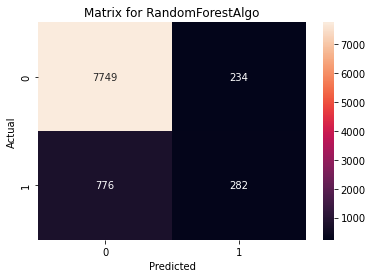

In [310]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matrix for RandomForestAlgo')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## **SMOTE**

In [327]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(df1,df2)

## **Making Model**

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X_train,X_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=4, stratify=y_sm)

# **RandomForest**

In [330]:
from sklearn.ensemble import RandomForestClassifier 

In [331]:
rf = RandomForestClassifier(n_estimators=10)

In [332]:
X_train,X_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=4, stratify=y_sm)

In [333]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [334]:
y_pred = rf.predict(X_test)

In [335]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [336]:
confusion_matrix(y_test,y_pred)

array([[11110,   865],
       [ 1012, 10963]])

In [337]:
accuracy_score(y_test,y_pred)

0.9216283924843424

In [338]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11975
           1       0.93      0.92      0.92     11975

    accuracy                           0.92     23950
   macro avg       0.92      0.92      0.92     23950
weighted avg       0.92      0.92      0.92     23950



Text(33.0, 0.5, 'Actual')

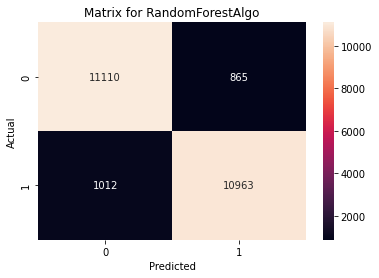

In [339]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matrix for RandomForestAlgo')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Creating Pickle File**

In [340]:
import pickle

In [341]:
pickle.dump(rf, open('termdeposit.pkl','wb'))